In [10]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt

In [2]:
max_words = 1000
batch_size = 32
epochs = 5

In [3]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
2113536/2110848 [==============================] - 2s 1us/step
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [4]:
print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Building model...


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 219us/step - loss: 1.4300 - acc: 0.6786 - val_loss: 1.0924 - val_acc: 0.7642
Epoch 2/5
8083/8083 [==============================] - 2s 191us/step - loss: 0.7867 - acc: 0.8186 - val_loss: 0.9392 - val_acc: 0.7875
Epoch 3/5
8083/8083 [==============================] - 1s 181us/step - loss: 0.5487 - acc: 0.8658 - val_loss: 0.8901 - val_acc: 0.7976
Epoch 4/5
8083/8083 [==============================] - 2s 189us/step - loss: 0.4133 - acc: 0.8998 - val_loss: 0.8798 - val_acc: 0.8031
Epoch 5/5
8083/8083 [==============================] - 2s 189us/step - loss: 0.3228 - acc: 0.9170 - val_loss: 0.9216 - val_acc: 0.7976


In [7]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

2246/2246 [==============================] - 0s 39us/step


In [8]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.8919958900577345
Test accuracy: 0.794746215494212


In [11]:
model.metrics_names

['loss', 'acc']

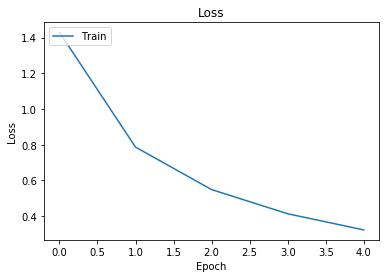

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

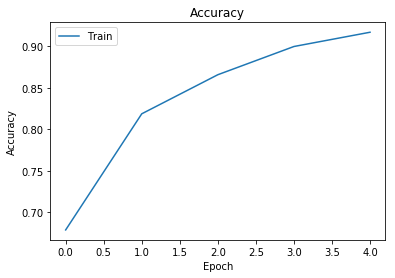

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()